In [1]:
from pylab import *
import nltk

nltk.download('stopwords')
from sklearn.datasets import fetch_20newsgroups
from nltk import word_tokenize
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
import re
import string
from collections import Counter

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/muzaffar/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [26]:
def get_stop_words():
    """
    >>> list(get_stop_words()[:7])
    ['i', 'me', 'my', 'myself', 'we', 'our', 'ours']
    """
    stop_words = stopwords.words('english')
    stop_words = stop_words + list(string.printable)
    return stop_words

In [3]:
def get_and_prepare_data(stop_words):
    """
    This method will load 20newsgroups data and 
    and remove stop words from it using given stop word list.
    :param stop_words: 
    :return: 
    """
    newsgroups_data_sample = fetch_20newsgroups(subset='train')
    tokenized_corpus = [word.lower() for sentence in newsgroups_data_sample['data'] \
                        for word in word_tokenize(re.sub(r'([^\s\w]|_)+', ' ', sentence)) \
                        if word.lower() not in stop_words]
    return tokenized_corpus


In [35]:
def get_frequency(corpus, n):
    """
    >>> get_frequency(['this', 'is','a','cat'],4)
    [('is', 1), ('a', 1), ('cat', 1), ('this', 1)]
    
    """
    token_count_di = Counter(corpus)
    return token_count_di.most_common(n)

In [5]:
stop_word_list = get_stop_words()
corpus = get_and_prepare_data(stop_word_list)
get_frequency(corpus, 50)

[('ax', 62412),
 ('edu', 21321),
 ('subject', 12265),
 ('com', 12134),
 ('lines', 11835),
 ('organization', 11233),
 ('one', 9017),
 ('would', 8910),
 ('writes', 7844),
 ('article', 7438),
 ('people', 5977),
 ('like', 5868),
 ('university', 5589),
 ('posting', 5507),
 ('know', 5134),
 ('get', 4998),
 ('host', 4996),
 ('nntp', 4814),
 ('max', 4776),
 ('think', 4583),
 ('also', 4308),
 ('use', 4187),
 ('time', 4102),
 ('new', 3986),
 ('good', 3759),
 ('ca', 3546),
 ('could', 3511),
 ('well', 3480),
 ('us', 3364),
 ('may', 3313),
 ('even', 3280),
 ('see', 3065),
 ('cs', 3041),
 ('two', 3015),
 ('way', 3002),
 ('god', 2998),
 ('first', 2976),
 ('many', 2945),
 ('make', 2894),
 ('much', 2879),
 ('system', 2817),
 ('distribution', 2767),
 ('right', 2742),
 ('world', 2724),
 ('say', 2706),
 ('want', 2522),
 ('go', 2474),
 ('anyone', 2468),
 ('10', 2466),
 ('reply', 2463)]

In [6]:
def get_actual_and_expected_frequencies(corpus):
    freq_dict = get_frequency(corpus, 1000)
    actual_frequencies = []
    expected_frequencies = []
    for rank, tup in enumerate(freq_dict):
        actual_frequencies.append(log(tup[1]))
        rank = 1 if rank == 0 else rank
        # expected frequency 1/rank as per zipf’s law
        expected_frequencies.append(1 / rank)
    return actual_frequencies, expected_frequencies
 


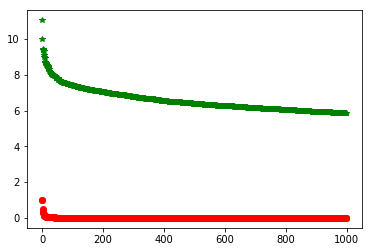

In [7]:
def plot(actual_frequencies, expected_frequencies):
    plt.plot(actual_frequencies, 'g*', expected_frequencies, 'ro')
    plt.show()
 
 
# We will plot the actual and expected frequencies
actual_frequencies, expected_frequencies = get_actual_and_expected_frequencies(corpus)
plot(actual_frequencies, expected_frequencies)


#### As we can see in the above graph the two curves are almost parallel i.e we can say frequencies are proportional

In [36]:
import doctest
doctest.testmod(verbose=True)

Trying:
    get_frequency(['this', 'is','a','cat'],4)
Expecting:
    [('is', 1), ('a', 1), ('cat', 1), ('this', 1)]
ok
Trying:
    list(get_stop_words()[:7])
Expecting:
    ['i', 'me', 'my', 'myself', 'we', 'our', 'ours']
ok
4 items had no tests:
    __main__
    __main__.get_actual_and_expected_frequencies
    __main__.get_and_prepare_data
    __main__.plot
2 items passed all tests:
   1 tests in __main__.get_frequency
   1 tests in __main__.get_stop_words
2 tests in 6 items.
2 passed and 0 failed.
Test passed.


TestResults(failed=0, attempted=2)